<a href="https://colab.research.google.com/github/keisuke6616/CDM/blob/master/Figure2%2C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I examine performance of the cross-data-matrix methodology.

\\

Setting : \\
${\bf X} = [{\bf x_1}, \ldots, {\bf x_n}]$ : d $\times$ n data matrix with d > n, where ${\bf x_k} = (x_{1k}, \ldots, x_{dk})^{\mathrm T}, k = 1, \ldots, n \, iid \, E[{\bf x_k}] = {\bf 0}, Var[{\bf x_k}] = {\bf \Sigma}$ \\
The eigen-decomposition of ${\bf \Sigma}$ is ${\bf \Sigma} = {\bf H \Lambda H^{\mathrm T}}$, where ${\bf \Lambda}$ is a diagonal matrix of eigenvalues $\lambda_1\geq \ldots \geq \lambda_d (>0)$ and ${\bf H} = [{\bf h_1}, \ldots, {\bf h_d}]$ is a matrix of corresponding eigenvectors. \\
${\bf Z} = {\bf \Lambda^{1/2} H X}$ is a d $\times$ n sphered data matrix from a distribution with the identity covariance matrix.
I can write ${\bf Z} = [{\bf z_1}, \ldots, {\bf z_d}]^{\mathrm T}$ and ${\bf z_j} = (z_{j1}, \ldots, z_{jn}), j = 1, \ldots, d$ \\

${\bf S} = n^{-1} {\bf XX^{\mathrm T}}$ : The sample covariance matrix \\
${\bf S}_D = n^{-1} {\bf X^{\mathrm T} X}$ : The dual matrix \\

\\

Model : \\
${\lambda_j} = a_j d^{\alpha_j} \, (j = 1, \ldots, m)$ and ${\lambda_j} = c_j \, (j = m+1, \ldots, d)$ \\
where ${a_j}(>0)$, ${c_j}(>0)$ and ${\alpha_j}(>0)$ are unknown constants, and  $m$ is unknown positive integer. \\

\\

The cross-data-methodology : \\
${\bf X}_i = [{\bf x_{i1}}, \ldots, {\bf x_{in}}]$ : d $\times$ n data matrix, $i = 1, 2$ \\
Yata and Aoshima define a cross data matrix by ${\bf S}_{D(1)} = (n_1 n _2)^{-1} {\bf X_1 X_2}$, where ${n_1 = O(n), n_2 = O(n)}$ \\
Then you can calculate the singular values ${\tilde \lambda}_j$'s of ${\bf S}_{D(1)}$ for the estimation of $\lambda_j$'s \\

\\

Simulation : \\

At first, Yata and Aoshima considered the Caussian case.
Independent pseudorandom normal observations were generated from $N_d({\bf 0}, {\bf \Sigma})$ with d = 1600 and ${\bf \Sigma}$ have $\lambda_1 = d^{2/3}$, $\lambda_2 = d^{1/3}$ and $\lambda_3 = \cdots = \lambda_d = 1$ as eigenvalue in power spiked model. They used the sample of size n = 20(20)100 to define the data matrix ${\bf X}$ : d$\times$n for calculation of ${\bf S}_D$ \\
I compered with ${\tilde \lambda}$ and ${\hat \lambda}$, where ${\tilde \lambda}$ and ${\hat \lambda}$ are the estimation of $\lambda$ by using the cross-data-methodology and using dual matrix respectively.



In [0]:
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt

import time


# Figure 2, 3

In [0]:
t1 = time.time()
np.random.seed(42)

D = 1600
eig = np.array([D**(2/3), D**(1/3)] + [1 for i in range(D-2)])

N = [20*i for i in range(1, 6, 1)]
NN = len(N)
index = [i for i in range(NN)]

Times = 100

result_mean = np.zeros((2, 2, NN))
result_var = np.zeros((2, 2, NN))
dual = np.zeros((2, Times))
cross = np.zeros((2, Times))


for n, pc in zip(N, index):
    print('Sample size: {}'.format(n))
    
    for t in range(Times):
        X = np.random.normal(0, 1, (n, D)) *  np.sqrt(eig)
        
        # dual
        Sd = np.dot(X, X.T) / n
        for i in range(2):
            dual[i, t] = SortEig(Sd)[0][i]
            
        # cross-data
        for i in range(2):
            cross[i, t] = CDM(X)[i]
    
    for i in range(2):
        result_mean[0, i, pc] = np.mean(dual[i])
        result_mean[1, i, pc] = np.mean(cross[i])
        
        result_var[0, i, pc] = np.var(dual[i], ddof=1)
        result_var[1, i, pc] = np.var(cross[i], ddof=1)
        
    
    print('Mean')
    print('Dual: {}'.format(result_mean[0, :, pc]))
    print('Cross: {}'.format(result_mean[1, :, pc]))
    print('True: {}'.format(eig[:2]))
    print('')
    
    print('Var')
    print('Dual: {}'.format(result_var[0, :, pc]))
    print('Cross: {}'.format(result_var[1, :, pc]))
    
    print('Finished')
    print('')



Sample size: 20
Mean
Dual: [216.20938079  98.56290014]
Cross: [129.22943712  22.37031928]
True: [136.79807573  11.69607095]

Var
Dual: [1867.94133587    8.12703978]
Cross: [1619.84873197    6.65467876]
Finished

Sample size: 40
Mean
Dual: [175.74710494  55.51617011]
Cross: [132.75508428  18.05920295]
True: [136.79807573  11.69607095]

Var
Dual: [1024.78784044    3.92394604]
Cross: [1057.18989443    2.81529247]
Finished

Sample size: 60
Mean
Dual: [162.77693996  40.63824177]
Cross: [133.90033385  15.7894775 ]
True: [136.79807573  11.69607095]

Var
Dual: [553.91413258   3.36903576]
Cross: [535.06747753   2.13286262]
Finished

Sample size: 80
Mean
Dual: [160.88670342  33.45390197]
Cross: [139.45070418  14.76817135]
True: [136.79807573  11.69607095]

Var
Dual: [535.57377434   2.78158045]
Cross: [528.46003998   2.38027651]
Finished

Sample size: 100
Mean
Dual: [152.14736156  28.88754572]
Cross: [134.95807405  14.03687116]
True: [136.79807573  11.69607095]

Var
Dual: [318.14598404   2.072942

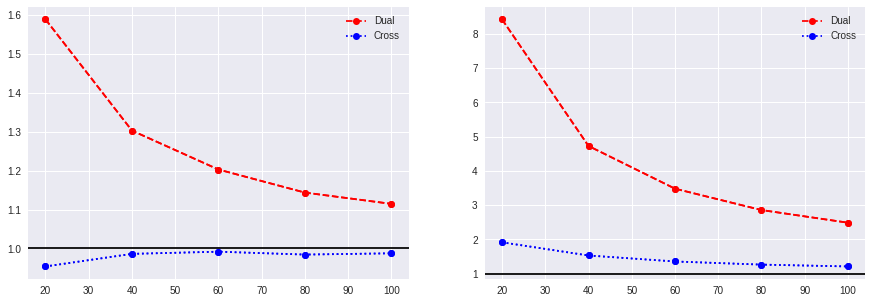

In [0]:
plt.figure(figsize=(15, 5))
handles = []
label_list = ['Dual', 'Cross']

for i in range(2):
    plt.subplot(1, 2, i+1)
    
    for j in range(2):
        line1, = plt.plot(N, result_mean[0, i] / eig[i], 'o--', color='red', label=label_list[j])
        line2, = plt.plot(N, result_mean[1, i] / eig[i], 'o:', color='blue', label=label_list[j])
        if i % 2 == 0:
            handles.append(line1); handles.append(line2)
        
        
    plt.axhline(y=1, color='black')
    plt.legend(handles, label_list)

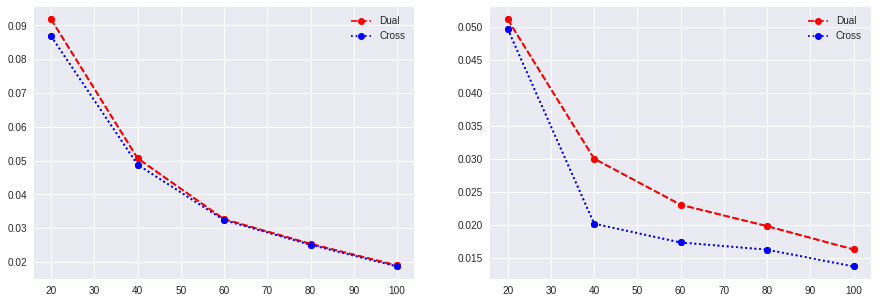

In [0]:
plt.figure(figsize=(15, 5))
handles = []
label_list = ['Dual', 'Cross']

for i in range(2):
    plt.subplot(1, 2, i+1)
    
    for j in range(2):
        line1, = plt.plot(N, result_var[0, i] / eig[i]**2, 'o--', color='red', label=label_list[j])
        line2, = plt.plot(N, result_var[1, i] / eig[i]**2, 'o:', color='blue', label=label_list[j])
        if i % 2 == 0:
            handles.append(line1); handles.append(line2)
       
    plt.legend(handles, label_list)

# Function

## SortEig

In [0]:
import numpy as np
import numpy.linalg as la

def SortEig(X):
    value, vec = la.eig(X)
    idx = value.argsort()[::-1]
    P = value[idx]
    Q = vec.T[idx]
       
    return(P, Q.T)

## CDM

In [0]:
import numpy as np

def CDM(X):
    N, D = X.shape
    value = np.zeros(D)
    
    n1 = int(np.ceil(N / 2))
    n2 = N - n1
    X1, X2 = X[:n1], X[-n2:]
    
    Sdc = np.dot(X1, X2.T) / np.sqrt(n1 * n2)
    value = np.sort(la.svd(Sdc)[1])[::-1]
    
    return value